# How many responses per contest?

This notebook will analyze

1. the number of responses recorded in the CSVs
2. the number of responses recorded in `info.png`.

In [1]:
import os
import caption_contest_data as ccd

In [2]:
contests = ccd.summary_ids()
print(contests)

{520, 521, 522, 523, 524, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, '518_summary_LilUCB.csv', 537, 538, 539, 540, '519_summary_RoundRobin.csv', 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, '559_summary_RandomSamping.csv', 561, 562, 563, 565, 566, 567, 568, '511_summary_RoundRobin.csv', 564, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, '509-round2_summary_RoundRobin.csv', 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, '516_summary_RoundRobin.csv', 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, '517_summary_RoundRobin.csv', 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 665, 666, 667, 668, 669, 670, 671, 672, '515_summary_LilUCB.csv', 673, '510_su

In [3]:
len(contests)

192

In [4]:
summaries = [ccd.summary(c) for c in contests]

In [5]:
import pandas as pd
summary = pd.concat(summaries, sort=False)

In [6]:
summary.head()

,rank,funny,somewhat_funny,unfunny,count,score,precision,contest,caption,target_id,original,somewhat_original,unoriginal
0,1,235.0,319.0,190.0,744,2.060484,0.027639,520,"I have to ask, do you feel that you could be a...",NaN,NaN,NaN,NaN
1,2,738.0,858.0,631.0,2227,2.048047,0.016587,520,"Now that you've opened up, let's talk about wh...",NaN,NaN,NaN,NaN
2,3,228.0,285.0,272.0,785,1.943949,0.028433,520,It's normal to feel empty after a split.,NaN,NaN,NaN,NaN
3,4,58.0,104.0,73.0,235,1.936170,0.048630,520,You're right; some of us bruise easier than ot...,NaN,NaN,NaN,NaN
4,5,137.0,181.0,173.0,491,1.926680,0.035743,520,Would you feel more comfortable on the floor ?,NaN,NaN,NaN,NaN


In [7]:
import numpy as np
df = summary.pivot_table(index="contest", values="count", aggfunc=np.sum)
df.head()

,count
contest,
508,137868
509,98241
510,82627
511,56660
512,43120


In [8]:
if "count" in df.columns:
    df["responses"] = df["count"]
    del df["count"]
df = df.sort_values(by="contest")

In [9]:
show = df.iloc[-10:].copy()
show["responses"] /= 1e6

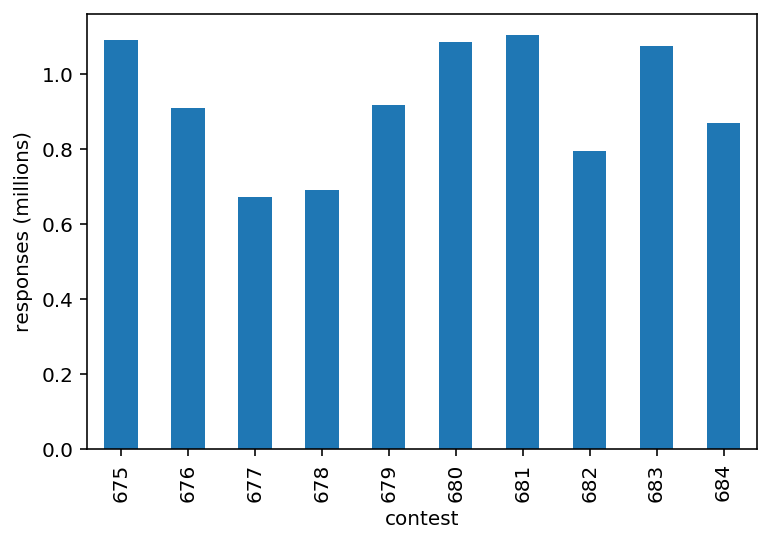

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
show.plot.bar(ax=ax)
ax.set_ylabel('responses (millions)')
ax.legend_.remove()

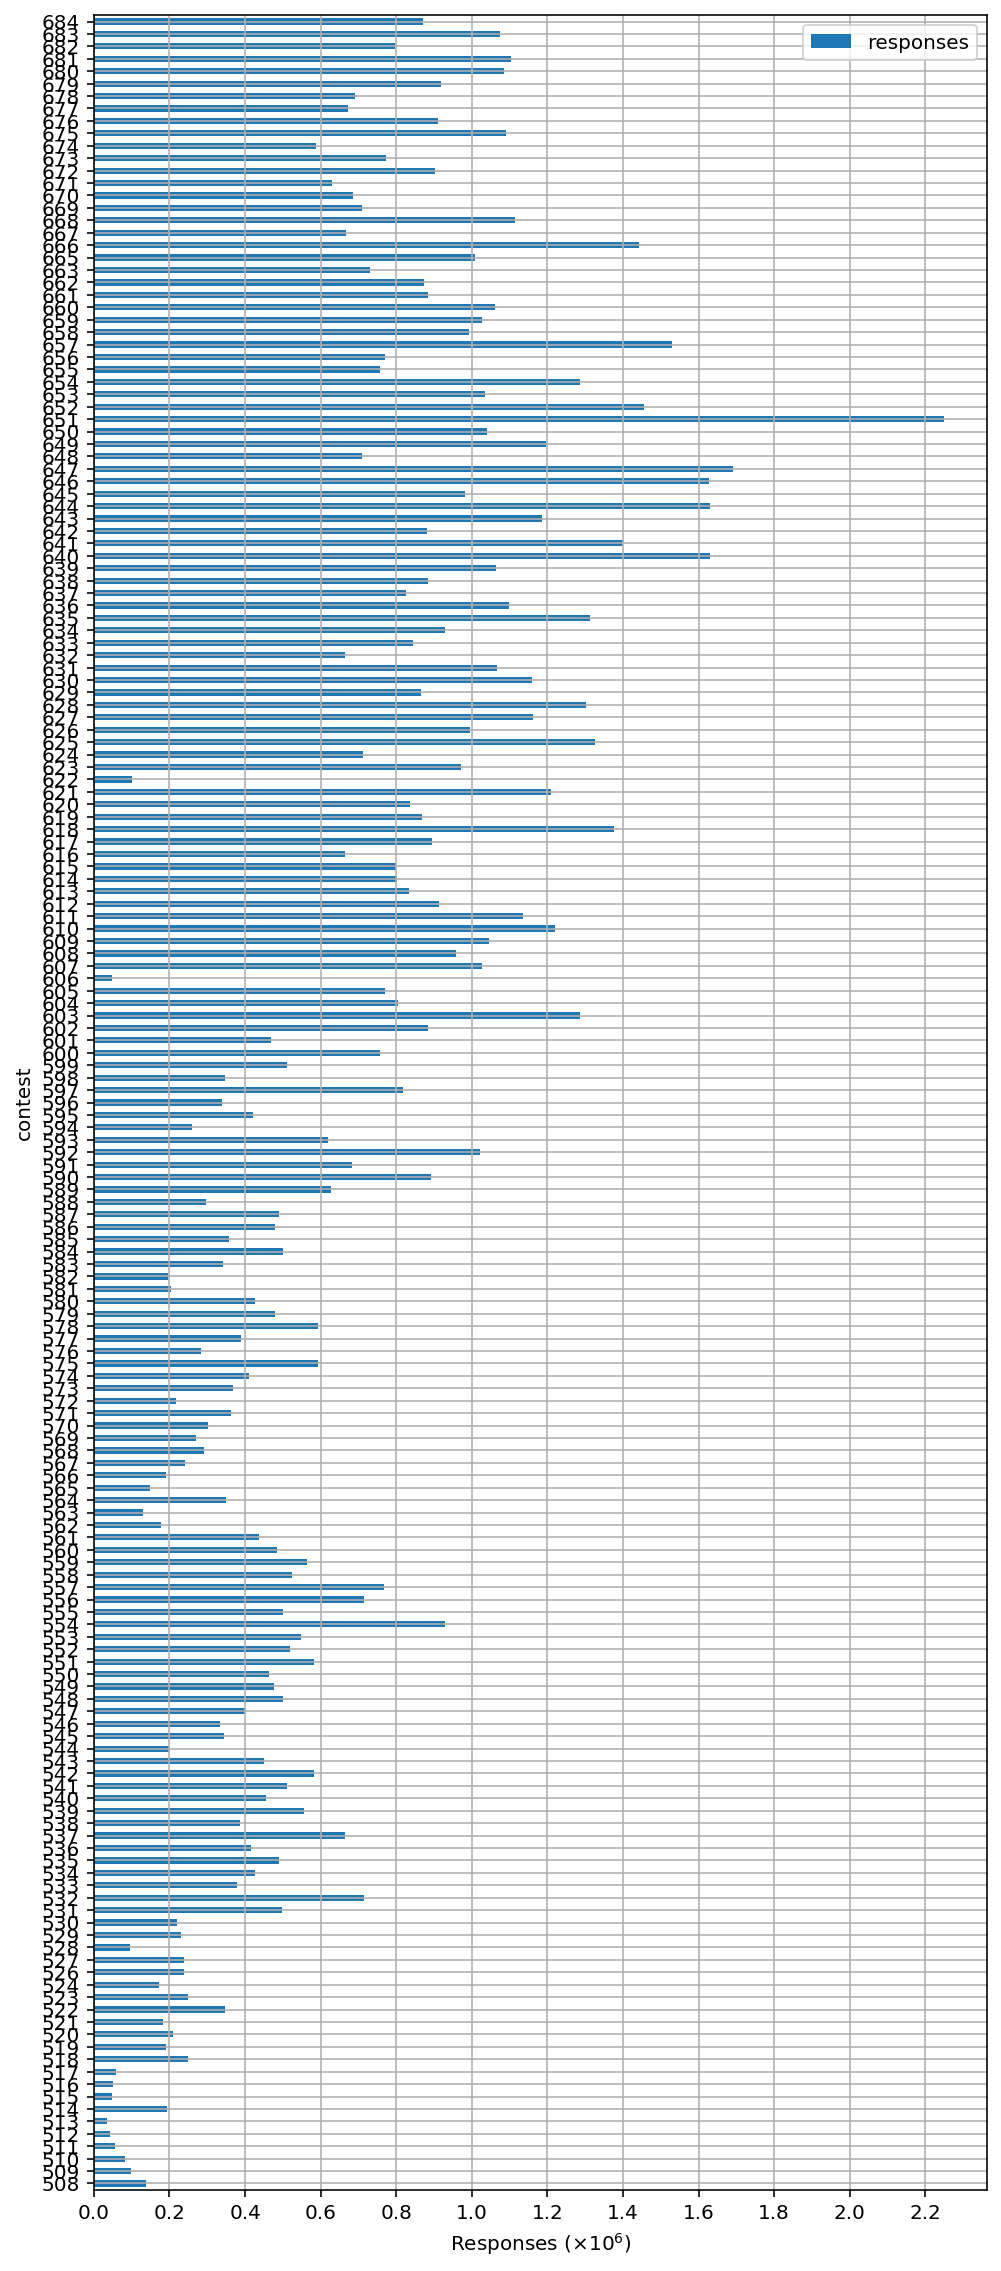

In [11]:
w = 4
fig, ax = plt.subplots(figsize=(2 * w, 5*w))
df.plot.barh(ax=ax)
ax.grid(alpha=1)
def func(value, _):
    return "{:0.1f}".format(value / 1e6)
ax.xaxis.set_major_formatter(plt.FuncFormatter(func))
ax.set_xlabel(r"Responses ($\times 10^6$)")
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2e6))